In [2]:
inpDir = 'datasets/' 

batch_size = 32
img_height = 128
img_width = 128

In [3]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  inpDir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  inpDir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


2023-03-19 22:48:36.911063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 22:48:37.138012: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 22:48:37.138064: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 22:48:39.272627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Found 1186 files belonging to 6 classes.
Using 949 files for training.


2023-03-19 22:48:42.204820: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-19 22:48:42.204883: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-19 22:48:42.204944: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seior): /proc/driver/nvidia/version does not exist
2023-03-19 22:48:42.205488: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1186 files belonging to 6 classes.
Using 237 files for validation.


In [4]:
class_names = train_ds.class_names
num_classes = len(class_names)

print('List Jenis Bunga : ')
for i in range(1, len(class_names) + 1):
    print(f'{i}. {class_names[i - 1]}')


List Jenis Bunga : 
1. dahlia
2. iris
3. lavender
4. matahari
5. mawar
6. melati


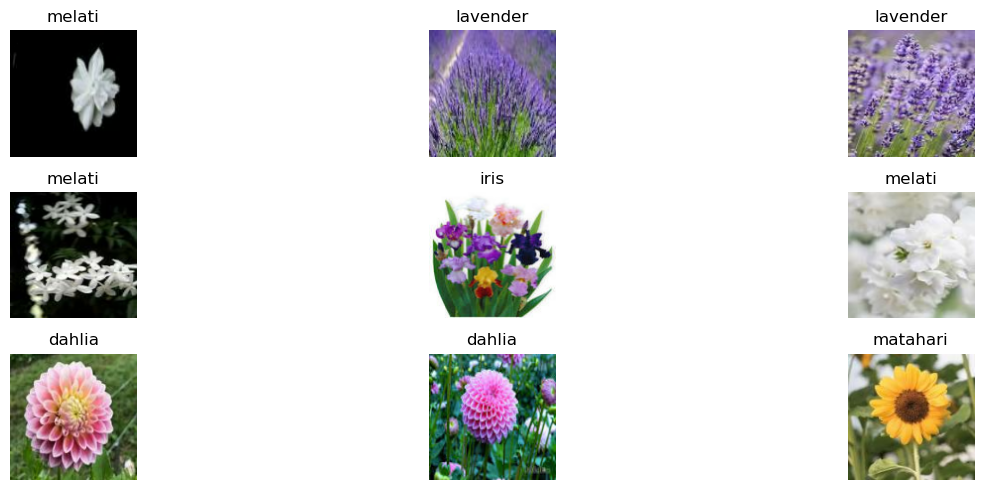

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for images, labels in train_ds.take(1):
    for i in range(0, 9):
        plt.subplot(3, 3, i+1 )
        plt.grid(False)
        plt.imshow(images[i].numpy().astype("uint8")) 
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.tight_layout()
    
plt.show()

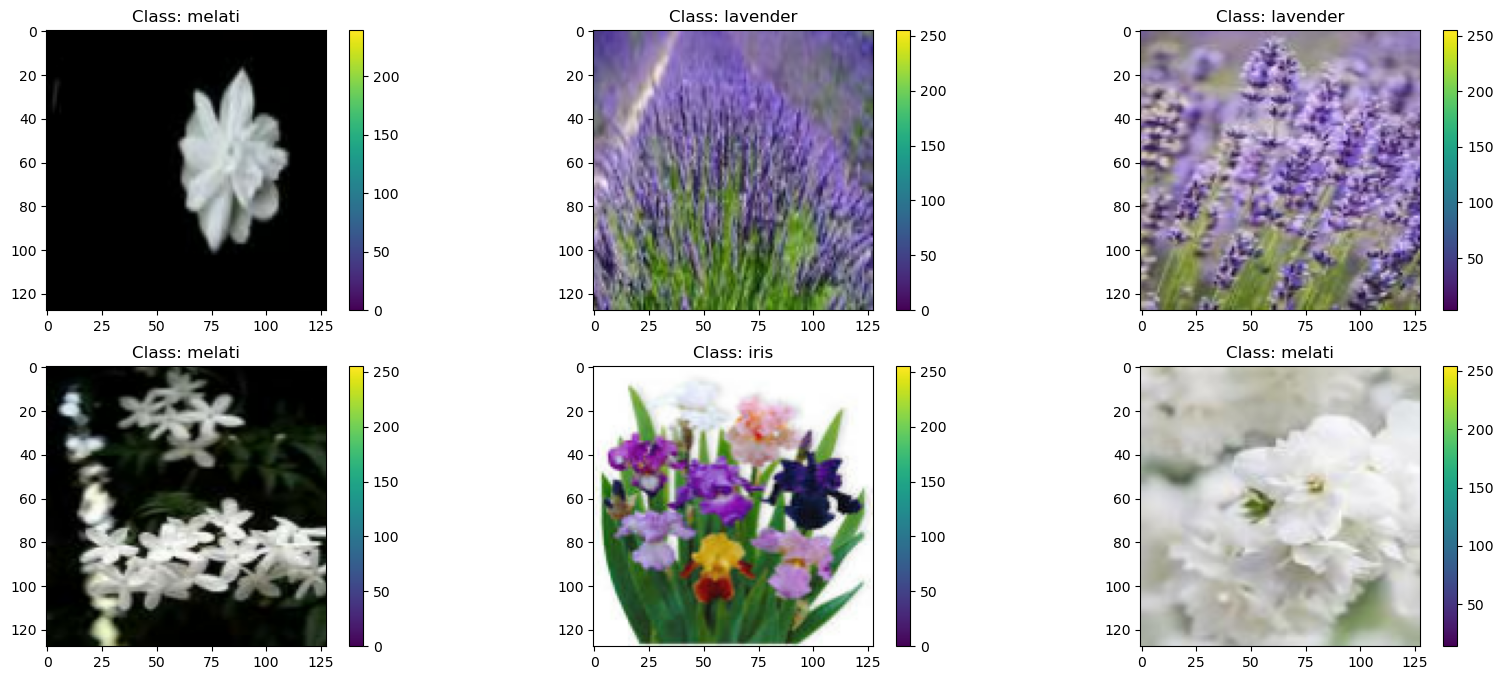

In [30]:
plt.figure(figsize=(20, 8))
for images, labels in train_ds.take(1):
    for i in range(0, 6):
        plt.subplot(2, 3, i+1 )
        plt.grid(False)
        plt.title(f'Class: {class_names[labels[i]]}')
        plt.imshow(images[i].numpy().astype("uint8")) 
        plt.colorbar()

plt.show()

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

In [8]:
import numpy as np

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 0.9993215


2023-03-19 22:48:47.004100: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [9]:
from tensorflow.keras.models import Sequential

model = Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # layers.Conv2D(8, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Conv2D(128, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Dropout(0.2), # TODO: add dropout
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=10,
)

Epoch 1/10
30/30 [==============================] - 32s 753ms/step - loss: 1.3693 - accuracy: 0.4489 - val_loss: 0.9632 - val_accuracy: 0.6287
Epoch 2/10
30/30 [==============================] - 23s 772ms/step - loss: 0.9403 - accuracy: 0.6396 - val_loss: 0.9804 - val_accuracy: 0.5781
Epoch 3/10
30/30 [==============================] - 24s 812ms/step - loss: 0.7858 - accuracy: 0.6976 - val_loss: 0.8042 - val_accuracy: 0.6962
Epoch 4/10
30/30 [==============================] - 16s 547ms/step - loss: 0.6776 - accuracy: 0.7724 - val_loss: 0.8146 - val_accuracy: 0.7215
Epoch 5/10
30/30 [==============================] - 18s 595ms/step - loss: 0.6321 - accuracy: 0.7629 - val_loss: 0.7396 - val_accuracy: 0.7300
Epoch 6/10
30/30 [==============================] - 18s 596ms/step - loss: 0.5641 - accuracy: 0.7935 - val_loss: 0.7002 - val_accuracy: 0.7722
Epoch 7/10
30/30 [==============================] - 19s 622ms/step - loss: 0.4723 - accuracy: 0.8261 - val_loss: 0.6557 - val_accuracy: 0.7890

In [12]:
model.summary() # TODO: make a graphic about accuracy

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                      

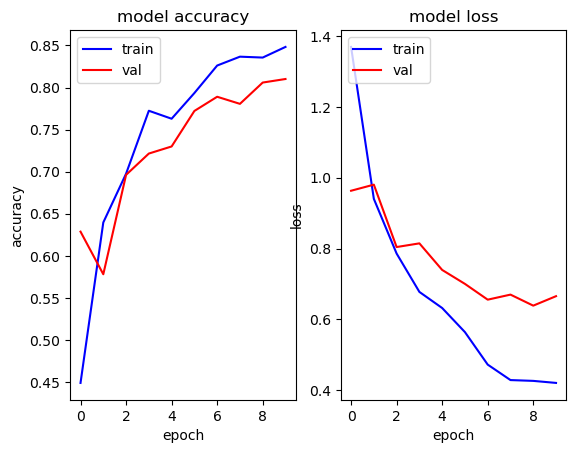

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplot(1, 2, 1)
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

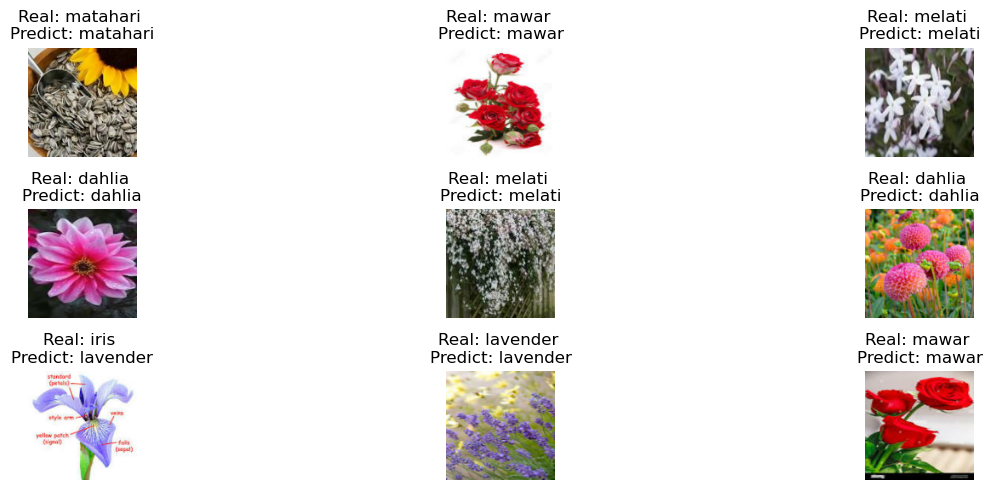

In [31]:
plt.figure(figsize=(15, 5))

for images, labels in test_ds.take(1):
    yhat = model.predict(images, verbose = 0)
    y_pred = yhat.argmax(axis = 1)
    for i in range (9):
        plt.subplot(3, 3, i+1 )
        plt.grid(False)
        plt.imshow (images[i].numpy().astype( "uint8" ))
        plt.title('Real: {} \nPredict: {}'.format(class_names[labels.numpy()[i]], class_names[y_pred[i]]))
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [15]:
import requests

path = 'example.jpeg'
path2 = 'example2.jpeg'

response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhj7vkhUidYLuql5kCy_JQtYKadUai67hkRg&usqp=CAU')
response2 = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTHY1hKLkvOoJ_0kOHLCRYZgbFSKgu5I-6tKILS_Yk0fA&s')

open(path, "wb").write(response.content)
open(path2, "wb").write(response2.content)

12904

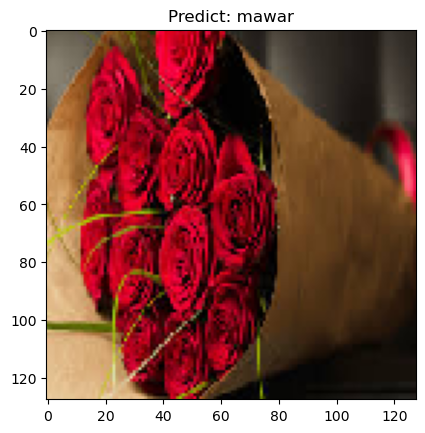

In [16]:
import matplotlib.image as mpimg

img = tf.keras.utils.load_img(path, target_size=(128,128))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

pred = model.predict(images, batch_size=batch_size, verbose=0)
iclass = pred.argmax(axis=-1)

plt.title(f'Predict: {class_names[iclass[0]]}')
plt.imshow(img)

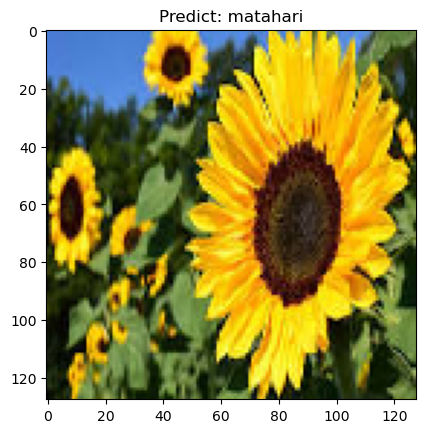

In [17]:
img = tf.keras.utils.load_img(path2, target_size=(128,128))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

pred = model.predict(images, batch_size=batch_size, verbose=0)
iclass = pred.argmax(axis=-1)

plt.title(f'Predict: {class_names[iclass[0]]}')
plt.imshow(img)